<a href="https://colab.research.google.com/github/skbuddy/Cardiovascular_Disease_Prediction/blob/master/Cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
from sklearn import preprocessing

In [0]:
import seaborn as sns

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('heart.csv')

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
row, col = data.shape

In [9]:
print(row,col)

303 14


In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [0]:
data.drop('restecg',axis=1, inplace =True)

In [0]:
list_drop=['exang','slope','oldpeak','ca','thal']
data.drop(list_drop, axis=1, inplace=True)

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,target
0,63,1,3,145,233,1,150,1
1,37,1,2,130,250,0,187,1
2,41,0,1,130,204,0,172,1
3,56,1,1,120,236,0,178,1
4,57,0,0,120,354,0,163,1


In [14]:
x = data
x[0:5]

,age,sex,cp,trestbps,chol,fbs,thalach,target
0,63,1,3,145,233,1,150,1
1,37,1,2,130,250,0,187,1
2,41,0,1,130,204,0,172,1
3,56,1,1,120,236,0,178,1
4,57,0,0,120,354,0,163,1


In [15]:
data.isnull().values.any() # If there are any null values in data set

False

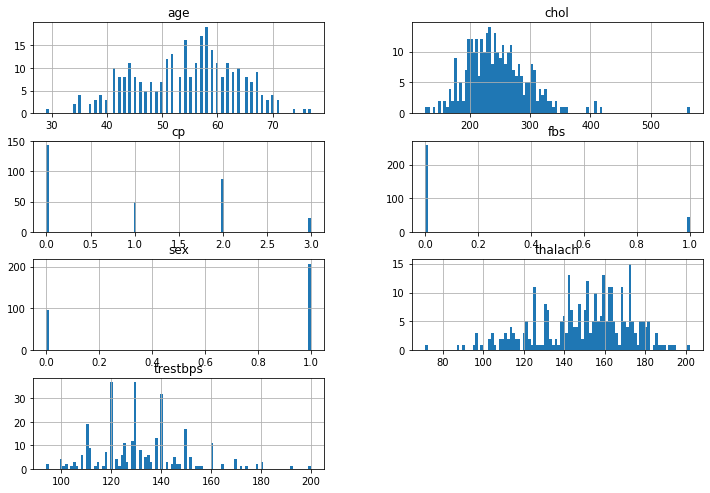

In [16]:
columns = list(data)[0:-1] # Excluding Target column which has only 0 or 1
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [17]:
data.corr() # It will show correlation matrix 

,age,sex,cp,trestbps,chol,fbs,thalach,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.398522,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.044020,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.295762,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.046698,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.009940,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.008567,-0.028046
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,1.000000,0.421741
target,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.421741,1.000000


In [0]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

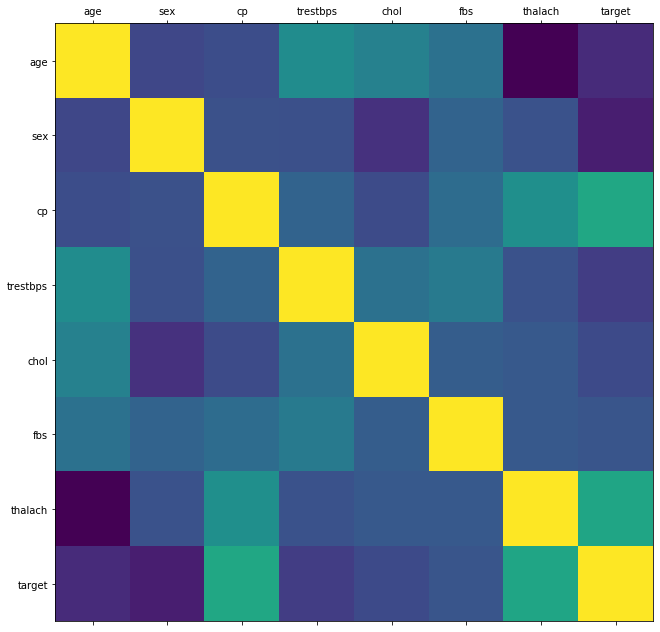

In [19]:
plot_corr(data)

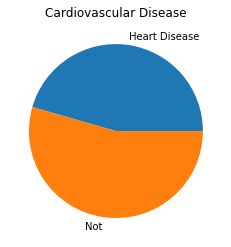

In [20]:
diabetes_0 = data[data['target']==0].count()
diabetes_1 = data[data['target']==1].count()
values = [diabetes_0['target'], diabetes_1['target']]
language = ['Heart Disease', 'Not']
plt.pie(values, labels = language)
plt.title('Cardiovascular Disease')
plt.show()

In [21]:
print(diabetes_0)
print(diabetes_1)

age         138
sex         138
cp          138
trestbps    138
chol        138
fbs         138
thalach     138
target      138
dtype: int64
age         165
sex         165
cp          165
trestbps    165
chol        165
fbs         165
thalach     165
target      165
dtype: int64


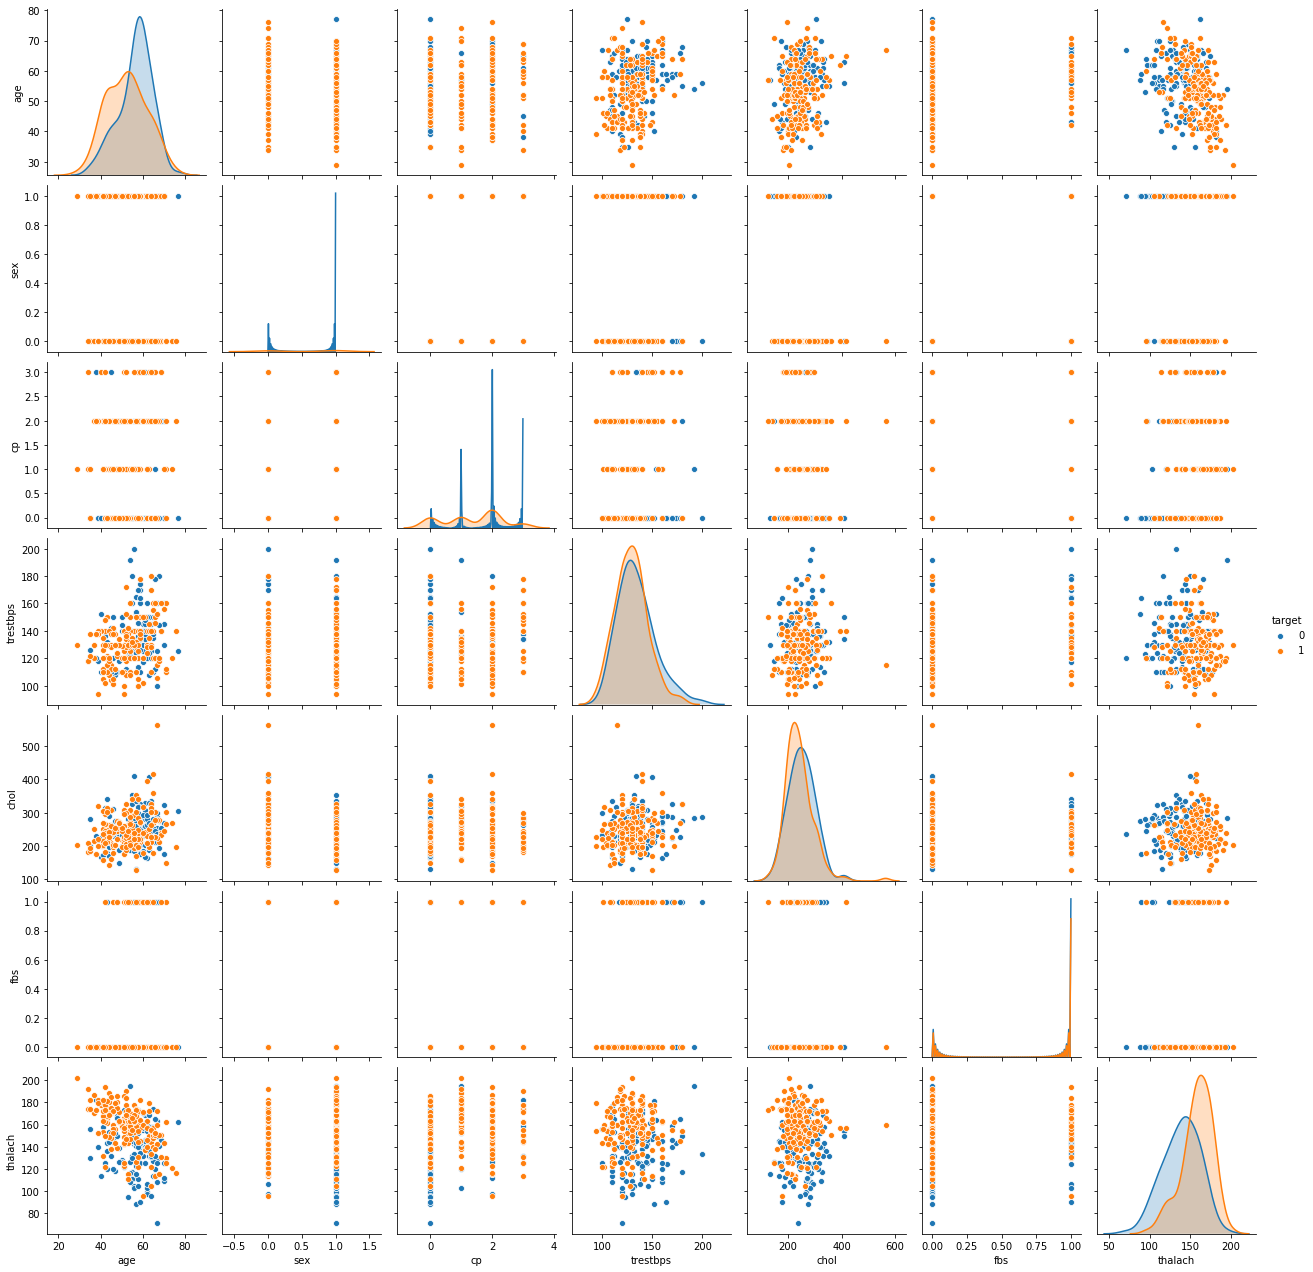

In [22]:
sns.pairplot(hue = 'target', data = data)

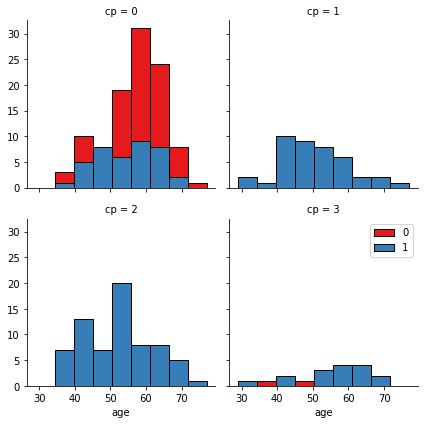

In [23]:
bins = np.linspace(data.age.min(), data.age.max(), 10)
g = sns.FacetGrid(data, col="cp", hue="target", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [24]:
y = data['target'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 8) (242,)
Test set: (61, 8) (61,)


# K Nearest Neighbour (KNN)

In [0]:
# Importing libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [88]:
# Training models up to 50 K's and evaluating accuracies

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62, 0.64, 0.66, 0.67, 0.69, 0.72, 0.7 , 0.7 , 0.69, 0.7 , 0.74,
       0.74, 0.74, 0.74, 0.7 , 0.72, 0.69, 0.69, 0.7 , 0.67, 0.72, 0.72,
       0.7 , 0.72, 0.7 , 0.72, 0.72, 0.7 , 0.7 , 0.72, 0.69, 0.7 , 0.72,
       0.7 , 0.69, 0.72, 0.69, 0.69, 0.67, 0.66, 0.72, 0.7 , 0.67, 0.69,
       0.69, 0.7 , 0.67, 0.72, 0.7 ])

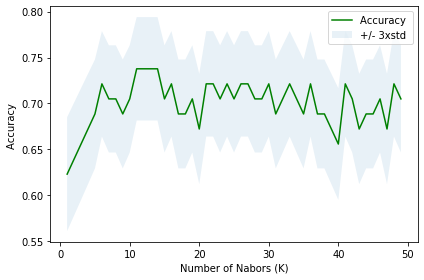

In [89]:
# Plotting accuracies for different number of neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [90]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6086956521739131

In [92]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.6941182986264952

In [91]:
# Getting the best K

print( "The best accuracy was with", mean_acc.max()*100, "with k=", mean_acc.argmax()+1) 

The best accuracy was with 73.77049180327869 with k= 11



#SVM
---



In [0]:
# Importing library

from sklearn import svm

In [68]:
# Training the model

datasvm = svm.SVC(kernel='rbf')
datasvm.fit(X_train,y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
# predicting on the test split

yhat = datasvm.predict(X_test)
yhat[0:5]

array([0, 1, 1, 1, 0])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        42
           1       0.71      0.88      0.78        58

    accuracy                           0.72       100
   macro avg       0.73      0.69      0.69       100
weighted avg       0.73      0.72      0.71       100

Confusion matrix, without normalization
[[51  7]
 [21 21]]


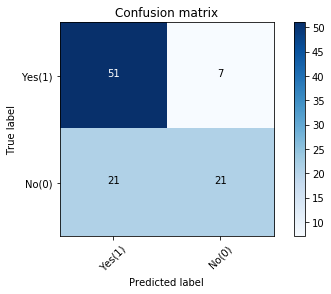

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes(1)','No(0)'],normalize= False,  title='Confusion matrix')

In [73]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7070769230769232

In [74]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6455696202531646

#Logistic Regression

In [0]:
# Importing Library

from sklearn.linear_model import LogisticRegression

In [76]:
# Training the model

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
# predicting on the test split

yhat = LR.predict(X_test)
yhat [0:5]

array([0, 0, 1, 0, 0])

In [78]:
# predicting probability of classes

yhat_prob = LR.predict_proba(X_test)
yhat_prob [0:5]

array([[0.82, 0.18],
       [0.52, 0.48],
       [0.28, 0.72],
       [0.63, 0.37],
       [0.52, 0.48]])

In [79]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.7741935483870968

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[48 10]
 [ 4 38]]


Confusion matrix, without normalization
[[48 10]
 [ 4 38]]


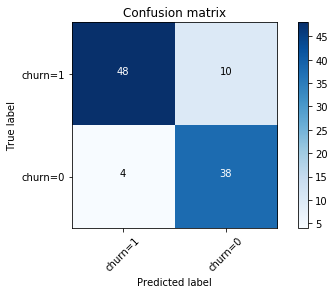

In [81]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [82]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        42
           1       0.92      0.83      0.87        58

    accuracy                           0.86       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.87      0.86      0.86       100



In [84]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.860848484848485

In [83]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4427164404115057

#Result

| Algorithm          | Jaccard  | F1-score   | LogLoss |
|--------------------|----------|------------|---------|
| KNN                | 0.6086   | 0.6941     | NA      |
| SVM                | 0.6455   | 0.7070     | NA      |
| LogisticRegression | 0.7741   | 0.8608     | 0.44    |

The Highest Accuracy Achieved was 85.833% with Logistic Regression Model.